In [1]:
import pandas as pd

In [2]:
man_df = pd.read_csv('data/caesar_fr.csv', encoding='utf-8', sep=';')
man_df=man_df.sample(frac=1)

In [3]:
caesar_male = man_df[man_df['sex'] == 1]

In [4]:
data=pd.DataFrame()

In [5]:
data=caesar_male.copy()

In [6]:
data.describe()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_ventre_maximal,tour_de_poitrine,tour_de_poitrine_mesure_a_la_main,...,angle_de_l_epaule,longueur_du_côte,longueur_du_tronc,longueur_de_sous_poitrine,largeur_de_la_taille,tour_de_poignet,largeur_du_bassin,profondeur_de_poitrine,tour_d_epaule,longueur_d_avant_bras
count,2106.000000,2102.000000,2106.000000,2107.0,2107.000000,2104.000000,2052.000000,2107.0,2106.000000,0.0,...,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0
mean,177.913588,37.538297,82.985266,1.0,26.720221,64.139418,41.485936,0.0,101.697680,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8.431030,12.763015,17.167743,0.0,1.545217,3.591747,2.403755,0.0,10.616289,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,131.495800,17.500000,45.812792,1.0,22.199600,40.894000,33.147000,0.0,75.793600,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,172.212000,26.200000,70.801175,1.0,25.704800,61.798200,39.801800,0.0,94.411800,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,177.495200,37.000000,80.058988,1.0,26.593800,64.008000,41.478200,0.0,100.406200,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,183.311800,47.000000,91.398788,1.0,27.711400,66.395600,43.027600,0.0,107.670600,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,218.287600,79.000000,181.436800,1.0,36.703000,80.391000,50.165000,0.0,157.403800,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data=data.drop_duplicates()

In [8]:
data[['tour_de_ventre_maximal','tour_de_taille']].head()

,tour_de_ventre_maximal,tour_de_taille
3417,0,84.9884
1955,0,82.1944
367,0,77.1906
1828,0,83.3882
2515,0,79.5020


In [9]:
mesure=caesar_male[['tour_de_ventre_maximal','tour_de_taille','tour_de_cuisse','largeur_des_hanches']]

In [10]:
mesure.head()

,tour_de_ventre_maximal,tour_de_taille,tour_de_cuisse,largeur_des_hanches
3417,0,84.9884,57.9882,46.8884
1955,0,82.1944,58.2930,47.4980
367,0,77.1906,55.3974,45.8978
1828,0,83.3882,53.3908,45.2882
2515,0,79.5020,57.8104,48.1076


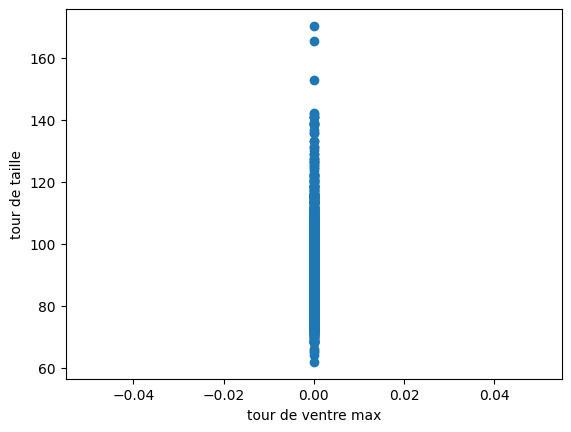

In [11]:
import matplotlib.pyplot as plt
# Plot Living area vs Sale price
plt.scatter(mesure['tour_de_ventre_maximal'], mesure['tour_de_taille'])
# Labels
plt.xlabel("tour de ventre max")
plt.ylabel("tour de taille")
plt.show()

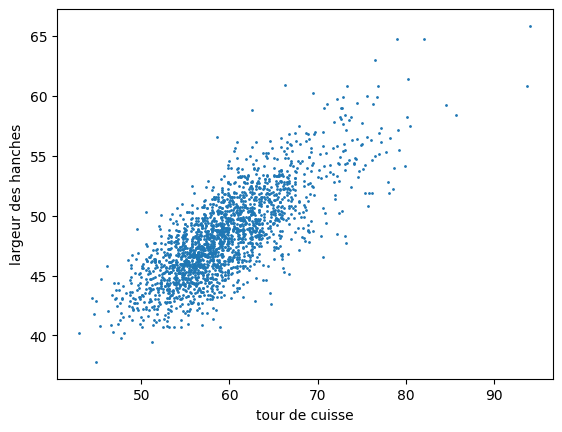

In [12]:
import matplotlib.pyplot as plt
# Plot Living area vs Sale price
plt.scatter(mesure['tour_de_cuisse'], mesure['largeur_des_hanches'],s=1)
# Labels
plt.xlabel("tour de cuisse")
plt.ylabel("largeur des hanches")
plt.show()

In [13]:
import pandas as pd

def classifier_morphologie(row):
    # Extraction des mesures
    tour_ventre = row['tour_de_ventre_maximal']
    tour_taille = row['tour_de_taille']
    tour_poitrine = row['tour_de_poitrine']
    tour_cuisse = row['tour_de_cuisse']
    largeur_hanches = row['largeur_des_hanches']
    
    # --- Catégorie VENTRE (basée sur le ratio ventre/taille) ---
    if tour_taille < 75:
        ventre = "plat"
    elif tour_taille < 90:
        ventre = "moyen"
    else:
        ventre = "rond"
    
    # --- Catégorie TORSE (basée sur le tour de poitrine seul ou comparé à la taille) ---
    if tour_poitrine < 85:
        torse = "fin"
    elif tour_poitrine < 100:
        torse = "moyen"
    else:
        torse = "large"
    
    # --- Catégorie CUISSES (ratio cuisse / hanches) ---
    ratio_cuisse = tour_cuisse / largeur_hanches
    if ratio_cuisse < 0.55:
        cuisses = "fines"
    elif ratio_cuisse < 0.65:
        cuisses = "moyennes"
    else:
        cuisses = "larges"
    
    return pd.Series([ventre, torse, cuisses], 
                     index=['categorie_ventre', 'categorie_torse', 'categorie_cuisses'])
    
# Remplace `df` par le nom de ton DataFrame
data[['categorie_ventre', 'categorie_torse', 'categorie_cuisses']] = data.apply(classifier_morphologie, axis=1)

In [14]:
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_ventre_maximal,tour_de_poitrine,tour_de_poitrine_mesure_a_la_main,...,longueur_de_sous_poitrine,largeur_de_la_taille,tour_de_poignet,largeur_du_bassin,profondeur_de_poitrine,tour_d_epaule,longueur_d_avant_bras,categorie_ventre,categorie_torse,categorie_cuisses
3417,175.0060,33.7,74.398160,1.0,26.0096,60.1980,41.8846,0,100.5078,NaN,...,0,0,0,0,0,0,0,moyen,large,larges
1955,188.5950,23.0,77.001778,1.0,25.2984,67.0052,40.2590,0,101.6000,NaN,...,0,0,0,0,0,0,0,moyen,large,larges
367,164.7952,35.0,61.915308,1.0,23.7998,57.7088,39.4970,0,85.8012,NaN,...,0,0,0,0,0,0,0,moyen,moyen,larges
1828,171.3992,25.0,67.997977,1.0,26.4922,59.6900,40.5892,0,91.9988,NaN,...,0,0,0,0,0,0,0,moyen,moyen,larges
2515,174.5996,38.0,71.440740,1.0,26.6954,60.0964,43.9674,0,96.0120,NaN,...,0,0,0,0,0,0,0,moyen,moyen,larges


In [15]:
data=data.loc[:, (data != 0).any()]

In [16]:
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,tour_de_poitrine_mesure_a_la_main,hauteur_de_poitrine,...,largeur_d_epaule,hauteur_des_epaules,largeur_des_epaules_a_l_horizontales,longueur_de_la_colonne_vertebrale_jusqu_au_poignet,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre,categorie_torse,categorie_cuisses
3417,175.0060,33.7,74.398160,1.0,26.0096,60.1980,41.8846,100.5078,NaN,126.7968,...,41.8846,145.5928,46.8884,81.6102,57.9882,84.9884,102.3112,moyen,large,larges
1955,188.5950,23.0,77.001778,1.0,25.2984,67.0052,40.2590,101.6000,NaN,135.4074,...,40.2590,152.9842,47.4980,86.5124,58.2930,82.1944,113.7920,moyen,large,larges
367,164.7952,35.0,61.915308,1.0,23.7998,57.7088,39.4970,85.8012,NaN,119.2022,...,39.4970,133.7945,45.8978,78.8924,55.3974,77.1906,93.8022,moyen,moyen,larges
1828,171.3992,25.0,67.997977,1.0,26.4922,59.6900,40.5892,91.9988,NaN,123.2408,...,40.5892,137.9982,45.2882,82.7024,53.3908,83.3882,97.9932,moyen,moyen,larges
2515,174.5996,38.0,71.440740,1.0,26.6954,60.0964,43.9674,96.0120,NaN,125.8062,...,43.9674,138.5951,48.1076,81.7880,57.8104,79.5020,99.3902,moyen,moyen,larges


In [17]:
data = data.dropna(how='all', axis=1)

In [18]:
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,largeur_d_epaule,hauteur_des_epaules,largeur_des_epaules_a_l_horizontales,longueur_de_la_colonne_vertebrale_jusqu_au_poignet,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre,categorie_torse,categorie_cuisses
3417,175.0060,33.7,74.398160,1.0,26.0096,60.1980,41.8846,100.5078,126.7968,78.6892,...,41.8846,145.5928,46.8884,81.6102,57.9882,84.9884,102.3112,moyen,large,larges
1955,188.5950,23.0,77.001778,1.0,25.2984,67.0052,40.2590,101.6000,135.4074,87.6046,...,40.2590,152.9842,47.4980,86.5124,58.2930,82.1944,113.7920,moyen,large,larges
367,164.7952,35.0,61.915308,1.0,23.7998,57.7088,39.4970,85.8012,119.2022,70.7898,...,39.4970,133.7945,45.8978,78.8924,55.3974,77.1906,93.8022,moyen,moyen,larges
1828,171.3992,25.0,67.997977,1.0,26.4922,59.6900,40.5892,91.9988,123.2408,77.6986,...,40.5892,137.9982,45.2882,82.7024,53.3908,83.3882,97.9932,moyen,moyen,larges
2515,174.5996,38.0,71.440740,1.0,26.6954,60.0964,43.9674,96.0120,125.8062,76.4032,...,43.9674,138.5951,48.1076,81.7880,57.8104,79.5020,99.3902,moyen,moyen,larges


In [19]:
import pandas as pd
import numpy as np

def remplacer_nan_par_moyenne(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            moyenne = df[col].mean(skipna=True)
            df[col] = df[col].fillna(moyenne)
    return df

data = remplacer_nan_par_moyenne(data)
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,largeur_d_epaule,hauteur_des_epaules,largeur_des_epaules_a_l_horizontales,longueur_de_la_colonne_vertebrale_jusqu_au_poignet,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre,categorie_torse,categorie_cuisses
3417,175.0060,33.7,74.398160,1.0,26.0096,60.1980,41.8846,100.5078,126.7968,78.6892,...,41.8846,145.5928,46.8884,81.6102,57.9882,84.9884,102.3112,moyen,large,larges
1955,188.5950,23.0,77.001778,1.0,25.2984,67.0052,40.2590,101.6000,135.4074,87.6046,...,40.2590,152.9842,47.4980,86.5124,58.2930,82.1944,113.7920,moyen,large,larges
367,164.7952,35.0,61.915308,1.0,23.7998,57.7088,39.4970,85.8012,119.2022,70.7898,...,39.4970,133.7945,45.8978,78.8924,55.3974,77.1906,93.8022,moyen,moyen,larges
1828,171.3992,25.0,67.997977,1.0,26.4922,59.6900,40.5892,91.9988,123.2408,77.6986,...,40.5892,137.9982,45.2882,82.7024,53.3908,83.3882,97.9932,moyen,moyen,larges
2515,174.5996,38.0,71.440740,1.0,26.6954,60.0964,43.9674,96.0120,125.8062,76.4032,...,43.9674,138.5951,48.1076,81.7880,57.8104,79.5020,99.3902,moyen,moyen,larges


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Colonnes à encoder
colonnes_cat = ['categorie_ventre', 'categorie_torse', 'categorie_cuisses']

# Afficher les valeurs uniques pour vérification
for col in colonnes_cat:
    print(f"Valeurs uniques pour '{col}' :", data[col].unique())

# Instancier OneHotEncoder avec drop='if_binary' (garde 1 seule colonne pour les colonnes binaires)
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

# Fit + transform sur les colonnes sélectionnées
encoded_array = ohe.fit_transform(data[colonnes_cat])

# Obtenir les noms des nouvelles colonnes générées
encoded_col_names = ohe.get_feature_names_out(colonnes_cat)

# Créer un DataFrame avec les colonnes encodées
df_encoded = pd.DataFrame(encoded_array, columns=encoded_col_names, index=data.index)

# Fusionner avec le DataFrame d’origine
mesure_sc = pd.concat([data.drop(columns=colonnes_cat), df_encoded], axis=1)

# Aperçu du DataFrame final
mesure_sc.head()


Valeurs uniques pour 'categorie_ventre' : ['moyen' 'rond' 'plat']
Valeurs uniques pour 'categorie_torse' : ['large' 'moyen' 'fin']
Valeurs uniques pour 'categorie_cuisses' : ['larges']


,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre_moyen,categorie_ventre_plat,categorie_ventre_rond,categorie_torse_fin,categorie_torse_large,categorie_torse_moyen,categorie_cuisses_larges
3417,175.0060,33.7,74.398160,1.0,26.0096,60.1980,41.8846,100.5078,126.7968,78.6892,...,57.9882,84.9884,102.3112,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1955,188.5950,23.0,77.001778,1.0,25.2984,67.0052,40.2590,101.6000,135.4074,87.6046,...,58.2930,82.1944,113.7920,1.0,0.0,0.0,0.0,1.0,0.0,1.0
367,164.7952,35.0,61.915308,1.0,23.7998,57.7088,39.4970,85.8012,119.2022,70.7898,...,55.3974,77.1906,93.8022,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1828,171.3992,25.0,67.997977,1.0,26.4922,59.6900,40.5892,91.9988,123.2408,77.6986,...,53.3908,83.3882,97.9932,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2515,174.5996,38.0,71.440740,1.0,26.6954,60.0964,43.9674,96.0120,125.8062,76.4032,...,57.8104,79.5020,99.3902,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [21]:
from sklearn.preprocessing import RobustScaler

# 🟡 Colonnes à exclure du scaling
colonnes_a_exclure = [
    'longueur_du_bras', 'longueur_bras_binaire', 
    'categorie_ventre', 'categorie_torse', 'categorie_cuisses',
    'categorie_ventre_rond', 'categorie_torse_fin', 
    'categorie_torse_large', 'categorie_torse_moyen', 
    'categorie_cuisses_larges'
]

# 🟢 Colonnes à scaler (toutes les autres)
colonnes_a_scaler = [col for col in mesure_sc.columns if col not in colonnes_a_exclure]

# ⚙️ Instanciation et application du RobustScaler
scaler = RobustScaler()
df_scaled = mesure_sc.copy()
df_scaled[colonnes_a_scaler] = scaler.fit_transform(df_scaled[colonnes_a_scaler])
df_scaled.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre_moyen,categorie_ventre_plat,categorie_ventre_rond,categorie_torse_fin,categorie_torse_large,categorie_torse_moyen,categorie_cuisses_larges
3417,-0.224256,-0.158654,-0.274829,0.0,-0.291139,60.1980,0.127605,0.007678,-0.216058,-0.295918,...,-0.101449,-0.251880,-0.214984,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1955,1.000000,-0.673077,-0.148425,0.0,-0.645570,67.0052,-0.392720,0.090211,0.773723,0.897959,...,-0.057971,-0.458647,1.257329,0.0,0.0,0.0,0.0,1.0,0.0,1.0
367,-1.144165,-0.096154,-0.880863,0.0,-1.392405,57.7088,-0.636623,-1.103647,-1.089051,-1.353741,...,-0.471014,-0.828947,-1.306189,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1828,-0.549199,-0.576923,-0.585554,0.0,-0.050633,59.6900,-0.287029,-0.635317,-0.624818,-0.428571,...,-0.757246,-0.370301,-0.768730,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2515,-0.260870,0.048077,-0.418410,0.0,0.050633,60.0964,0.794272,-0.332054,-0.329927,-0.602041,...,-0.126812,-0.657895,-0.589577,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

def entrainer_regression_par_colonne(df, colonnes_explicatives, colonnes_cibles):
    """
    Entraîne une régression linéaire pour chaque colonne cible dans colonnes_cibles
    en utilisant les colonnes_explicatives comme variables d'entrée.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données.
        colonnes_explicatives (list): Liste des noms de colonnes à utiliser comme X.
        colonnes_cibles (list): Liste des noms de colonnes à prédire.

    Returns:
        dict: dictionnaire contenant pour chaque cible, son modèle entraîné et le score R².
    """
    resultats = {}

    for cible in colonnes_cibles:
        X = df[colonnes_explicatives]
        y = df[cible]

        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        resultats[cible] = {
            'modele': model,
            'score': score
        }

        print(f"✅ Modèle entraîné pour {cible} — Score R² : {score:.4f}")

    return resultats

# Exemple d’utilisation :
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]


# Par exemple, toutes les colonnes sauf colonnes_X sont cibles
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X]

imputer = SimpleImputer(strategy='median')  # ou strategy='mean'
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)


resultats = entrainer_regression_par_colonne(df_imputed, colonnes_X_valides, colonnes_y)


✅ Modèle entraîné pour sex — Score R² : 1.0000
✅ Modèle entraîné pour tour_de_cheville — Score R² : 0.5767
✅ Modèle entraîné pour longueur_du_bras — Score R² : 0.6075
✅ Modèle entraîné pour largeur_du_dos — Score R² : 0.4207
✅ Modèle entraîné pour tour_de_poitrine — Score R² : 0.9165
✅ Modèle entraîné pour hauteur_de_poitrine — Score R² : 0.8919
✅ Modèle entraîné pour hauteur_d_entrejambe — Score R² : 0.8111
✅ Modèle entraîné pour longueur_avant — Score R² : 0.5121
✅ Modèle entraîné pour largeur_des_hanches — Score R² : 0.6911
✅ Modèle entraîné pour hauteur_des_hanches — Score R² : 0.6974
✅ Modèle entraîné pour hauteur_des_genoux — Score R² : 0.7951
✅ Modèle entraîné pour tour_du_cou — Score R² : 0.4807
✅ Modèle entraîné pour largeur_d_epaule — Score R² : 0.4207
✅ Modèle entraîné pour hauteur_des_epaules — Score R² : 0.9094
✅ Modèle entraîné pour largeur_des_epaules_a_l_horizontales — Score R² : 0.6911
✅ Modèle entraîné pour longueur_de_la_colonne_vertebrale_jusqu_au_poignet — Score R²

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

def entrainer_regression_par_colonne(df, colonnes_explicatives, colonnes_cibles, test_size=0.2, random_state=42):
    """
    Entraîne une régression linéaire pour chaque colonne cible, avec train_test_split.

    Args:
        df (pd.DataFrame): Le DataFrame complet.
        colonnes_explicatives (list): Noms des colonnes à utiliser comme variables d'entrée (X).
        colonnes_cibles (list): Noms des colonnes à prédire (y).
        test_size (float): Proportion du jeu de test (entre 0 et 1).
        random_state (int): Graine pour la reproductibilité.

    Returns:
        dict: Pour chaque colonne cible, le modèle, score R² (train & test).
    """
    resultats = {}

    # 1. Imputer les NaN
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    for cible in colonnes_cibles:
        X = df_imputed[colonnes_explicatives]
        y = df_imputed[cible]

        # 2. Split des données
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # 3. Entraînement
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 4. Évaluation
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)

        resultats[cible] = {
            'modele': model,
            'score_train': score_train,
            'score_test': score_test
        }

        print(f"✅ {cible} — R² train: {score_train:.4f} | test: {score_test:.4f}")

    return resultats
    
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]


# Par exemple, toutes les colonnes sauf colonnes_X sont cibles
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X]

resultats = entrainer_regression_par_colonne(df_scaled, colonnes_X_valides, colonnes_y)

✅ sex — R² train: 1.0000 | test: 1.0000
✅ tour_de_cheville — R² train: 0.5783 | test: 0.5685
✅ longueur_du_bras — R² train: 0.6242 | test: 0.5433
✅ largeur_du_dos — R² train: 0.4008 | test: 0.4972
✅ tour_de_poitrine — R² train: 0.9196 | test: 0.9051
✅ hauteur_de_poitrine — R² train: 0.8865 | test: 0.9125
✅ hauteur_d_entrejambe — R² train: 0.8129 | test: 0.8017
✅ longueur_avant — R² train: 0.5082 | test: 0.5235
✅ largeur_des_hanches — R² train: 0.6791 | test: 0.7342
✅ hauteur_des_hanches — R² train: 0.6960 | test: 0.7004
✅ hauteur_des_genoux — R² train: 0.7900 | test: 0.8141
✅ tour_du_cou — R² train: 0.4805 | test: 0.4809
✅ largeur_d_epaule — R² train: 0.4008 | test: 0.4972
✅ hauteur_des_epaules — R² train: 0.9043 | test: 0.9294
✅ largeur_des_epaules_a_l_horizontales — R² train: 0.6791 | test: 0.7342
✅ longueur_de_la_colonne_vertebrale_jusqu_au_poignet — R² train: 0.6895 | test: 0.6478
✅ tour_de_cuisse — R² train: 0.8246 | test: 0.8416
✅ tour_de_taille — R² train: 0.8873 | test: 0.8946


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def entrainer_regression_cv(df, colonnes_explicatives, colonnes_cibles, n_splits=5, random_state=42):
    """
    Entraîne une régression linéaire pour chaque colonne cible avec K-Fold Cross Validation.

    Args:
        df (pd.DataFrame): Le DataFrame complet.
        colonnes_explicatives (list): Noms des colonnes explicatives.
        colonnes_cibles (list): Noms des colonnes cibles.
        n_splits (int): Nombre de folds pour la validation croisée.
        random_state (int): Graine pour la reproductibilité.

    Returns:
        dict: Pour chaque cible, moyenne et écart-type du score R² sur les folds.
    """
    resultats = {}

    # 1. Imputation des NaN
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # 2. Configuration du K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for cible in colonnes_cibles:
        X = df_imputed[colonnes_explicatives]
        y = df_imputed[cible]

        modele = LinearRegression()

        # 3. Cross-validation sur R²
        scores = cross_val_score(modele, X, y, cv=kf, scoring='r2')

        resultats[cible] = {
            'r2_moyen': np.mean(scores),
            'r2_ecart_type': np.std(scores),
            'r2_scores': scores
        }

        print(f"✅ {cible} — R² moyen: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

    return resultats
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X_valides]

resultats_cv = entrainer_regression_cv(df_scaled, colonnes_X_valides, colonnes_y, n_splits=5)


✅ sex — R² moyen: 1.0000 ± 0.0000
✅ tour_de_cheville — R² moyen: 0.5710 ± 0.0194
✅ longueur_du_bras — R² moyen: 0.6035 ± 0.0360
✅ largeur_du_dos — R² moyen: 0.4146 ± 0.0600
✅ tour_de_poitrine — R² moyen: 0.9157 ± 0.0084
✅ hauteur_de_poitrine — R² moyen: 0.8910 ± 0.0202
✅ hauteur_d_entrejambe — R² moyen: 0.8077 ± 0.0159
✅ longueur_avant — R² moyen: 0.5062 ± 0.0343
✅ largeur_des_hanches — R² moyen: 0.6857 ± 0.0351
✅ hauteur_des_hanches — R² moyen: 0.6922 ± 0.0154
✅ hauteur_des_genoux — R² moyen: 0.7921 ± 0.0255
✅ tour_du_cou — R² moyen: 0.4762 ± 0.0115
✅ largeur_d_epaule — R² moyen: 0.4146 ± 0.0600
✅ hauteur_des_epaules — R² moyen: 0.9085 ± 0.0233
✅ largeur_des_epaules_a_l_horizontales — R² moyen: 0.6857 ± 0.0351
✅ longueur_de_la_colonne_vertebrale_jusqu_au_poignet — R² moyen: 0.6758 ± 0.0291
✅ tour_de_cuisse — R² moyen: 0.8260 ± 0.0250
✅ tour_de_taille — R² moyen: 0.8880 ± 0.0054
✅ hauteur_de_la_taille — R² moyen: 0.7957 ± 0.0191


In [29]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def entrainer_tpot_regressions(df, colonnes_explicatives, colonnes_cibles, generations=4, population_size=20, random_state=42):
    """
    Utilise TPOT pour entraîner un modèle de régression automatique pour chaque variable cible.

    Args:
        df (pd.DataFrame): Le DataFrame complet.
        colonnes_explicatives (list): Colonnes d'entrée.
        colonnes_cibles (list): Colonnes cibles à prédire.
        generations (int): Nombre de générations pour TPOT.
        population_size (int): Taille de la population.
        random_state (int): Graine aléatoire.

    Returns:
        dict: Contient le score R² et le pipeline pour chaque cible.
    """
    resultats = {}

    # 1. Imputation des NaN
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    for cible in colonnes_cibles:
        print(f"\n⚙️ Traitement de la cible : {cible}")

        X = df_imputed[colonnes_explicatives]
        y = df_imputed[cible]

        # 2. Split pour test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state
        )

        # 3. TPOT
        tpot = TPOTRegressor(
            generations=generations,
            population_size=population_size,
            verbose=3,
            random_state=random_state,
            n_jobs=1,
            cv=2
        )

        tpot.fit(X_train, y_train)

        # 4. Score sur test
        r2_test = tpot.fitted_pipeline_.score(X_test, y_test)
        print(f"✅ {cible} — R² test: {r2_test:.4f}")

        resultats[cible] = {
            'r2_test': r2_test,
            'pipeline': tpot.fitted_pipeline_,
            'tpot_object': tpot
        }

    return resultats
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X_valides]

resultats_tpot = entrainer_tpot_regressions(df_scaled, colonnes_X_valides, colonnes_y)



⚙️ Traitement de la cible : sex


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51819 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [00:35<01:47, 35.74s/it]

Generation:  1
Best mean_squared_error score: 0.0


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [01:04<01:02, 31.42s/it]

Generation:  2
Best mean_squared_error score: 0.0


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [01:32<00:30, 30.03s/it]

Generation:  3
Best mean_squared_error score: 0.0


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:54<00:00, 28.54s/it]

Generation:  4
Best mean_squared_error score: 0.0


✅ sex — R² test: 1.0000

⚙️ Traitement de la cible : tour_de_cheville


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51856 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:12<03:37, 72.63s/it]

Generation:  1
Best mean_squared_error score: -0.2556252509289427


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:02<01:58, 59.10s/it]

Generation:  2
Best mean_squared_error score: -0.2556252509289427


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [03:07<01:01, 61.97s/it]

Generation:  3
Best mean_squared_error score: -0.2547985416713766


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:10<00:00, 62.61s/it]

Generation:  4
Best mean_squared_error score: -0.2547985416713766



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-datas

✅ tour_de_cheville — R² test: 0.5684

⚙️ Traitement de la cible : longueur_du_bras


Generation:  25%|████████████████████████████▌                                                                                     | 1/4 [02:05<06:17, 126.00s/it]

Generation:  1
Best mean_squared_error score: -4.822463605393365


Generation:  50%|█████████████████████████████████████████████████████████                                                         | 2/4 [05:03<05:12, 156.14s/it]

Generation:  2
Best mean_squared_error score: -4.822463605393365


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [08:17<02:53, 173.76s/it]

Generation:  3
Best mean_squared_error score: -4.822463605393365


Generation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [11:50<00:00, 177.56s/it]

Generation:  4
Best mean_squared_error score: -4.819461880223088



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ longueur_du_bras — R² test: 0.5277

⚙️ Traitement de la cible : largeur_du_dos


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52093 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [00:45<02:17, 45.71s/it]

Generation:  1
Best mean_squared_error score: -0.3454571133094245


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [01:36<01:37, 48.54s/it]

Generation:  2
Best mean_squared_error score: -0.34309328593217825


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [02:32<00:52, 52.08s/it]

Generation:  3
Best mean_squared_error score: -0.34309328593217825


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:03<00:00, 60.85s/it]

Generation:  4
Best mean_squared_error score: -0.34192096904296165


✅ largeur_du_dos — R² test: 0.5044

⚙️ Traitement de la cible : tour_de_poitrine


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52147 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:06<03:18, 66.32s/it]

Generation:  1
Best mean_squared_error score: -0.061429586761653804


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [01:52<01:48, 54.35s/it]

Generation:  2
Best mean_squared_error score: -0.061429586761653804


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [02:58<00:59, 59.63s/it]

Generation:  3
Best mean_squared_error score: -0.061429586761653804


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:53<00:00, 73.42s/it]

Generation:  4
Best mean_squared_error score: -0.05093868070571786


✅ tour_de_poitrine — R² test: 0.9041

⚙️ Traitement de la cible : hauteur_de_poitrine


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52233 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:03<03:11, 63.79s/it]

Generation:  1
Best mean_squared_error score: -0.06525237994752617


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:49<02:56, 88.25s/it]

Generation:  2
Best mean_squared_error score: -0.06525237994752617


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [04:12<01:26, 86.14s/it]

Generation:  3
Best mean_squared_error score: -0.0642407444725271


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [06:08<00:00, 92.18s/it]

Generation:  4
Best mean_squared_error score: -0.0642407444725271


✅ hauteur_de_poitrine — R² test: 0.8958

⚙️ Traitement de la cible : hauteur_d_entrejambe


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52306 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [00:58<02:54, 58.22s/it]

Generation:  1
Best mean_squared_error score: -0.1229490430821625


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:00<02:01, 60.78s/it]

Generation:  2
Best mean_squared_error score: -0.11226174392977648


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [05:33<02:10, 130.08s/it]

Generation:  3
Best mean_squared_error score: -0.11226174392977648


Generation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [08:28<00:00, 127.16s/it]

Generation:  4
Best mean_squared_error score: -0.1120992901848234



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


✅ hauteur_d_entrejambe — R² test: 0.8029

⚙️ Traitement de la cible : longueur_avant


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52459 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:01<03:04, 61.38s/it]

Generation:  1
Best mean_squared_error score: -0.2989038553887731


Generation:  50%|█████████████████████████████████████████████████████████                                                         | 2/4 [04:14<04:37, 138.89s/it]

Generation:  2
Best mean_squared_error score: -0.2956967842612451


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [05:32<01:51, 111.23s/it]

Generation:  3
Best mean_squared_error score: -0.29431503043419105


Generation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [11:03<00:00, 165.83s/it]

Generation:  4
Best mean_squared_error score: -0.29431503043419105



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


✅ longueur_avant — R² test: 0.5106

⚙️ Traitement de la cible : largeur_des_hanches


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52575 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [00:58<02:54, 58.22s/it]

Generation:  1
Best mean_squared_error score: -0.20765803742115307


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [01:48<01:47, 53.75s/it]

Generation:  2
Best mean_squared_error score: -0.20765803742115307


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [02:37<00:51, 51.20s/it]

Generation:  3
Best mean_squared_error score: -0.20765803742115307


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:26<00:00, 51.56s/it]

Generation:  4
Best mean_squared_error score: -0.196649226986917



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-datas

✅ largeur_des_hanches — R² test: 0.7401

⚙️ Traitement de la cible : hauteur_des_hanches


Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:05<03:15, 65.16s/it]

Generation:  1
Best mean_squared_error score: -0.19112121721752529


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:25<02:28, 74.05s/it]

Generation:  2
Best mean_squared_error score: -0.18939416427767808


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [03:37<01:13, 73.25s/it]

Generation:  3
Best mean_squared_error score: -0.18708805266066905


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:27<00:00, 66.91s/it]

Generation:  4
Best mean_squared_error score: -0.18705729414939282


✅ hauteur_des_hanches — R² test: 0.7030

⚙️ Traitement de la cible : hauteur_des_genoux


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52761 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:12<03:37, 72.45s/it]

Generation:  1
Best mean_squared_error score: -0.12095768624703204


Generation:  50%|█████████████████████████████████████████████████████████                                                         | 2/4 [04:18<04:38, 139.03s/it]

Generation:  2
Best mean_squared_error score: -0.12095768624703204


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [05:57<02:01, 121.16s/it]

Generation:  3
Best mean_squared_error score: -0.11975500905755801


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [06:35<00:00, 98.77s/it]

Generation:  4
Best mean_squared_error score: -0.11969944869623825


✅ hauteur_des_genoux — R² test: 0.8084

⚙️ Traitement de la cible : tour_du_cou


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53497 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:07<03:21, 67.30s/it]

Generation:  1
Best mean_squared_error score: -0.36183247728959445


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:26<02:28, 74.08s/it]

Generation:  2
Best mean_squared_error score: -0.36183247728959445


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [03:41<01:14, 74.52s/it]

Generation:  3
Best mean_squared_error score: -0.36183247728959445


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [05:03<00:00, 75.88s/it]

Generation:  4
Best mean_squared_error score: -0.3597609669561266



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-datas

✅ tour_du_cou — R² test: 0.4807

⚙️ Traitement de la cible : largeur_d_epaule


Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:09<03:29, 69.76s/it]

Generation:  1
Best mean_squared_error score: -0.3454571133094245


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:34<02:36, 78.32s/it]

Generation:  2
Best mean_squared_error score: -0.34309328593217825


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [03:44<01:14, 74.74s/it]

Generation:  3
Best mean_squared_error score: -0.34309328593217825


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [05:36<00:00, 84.10s/it]

Generation:  4
Best mean_squared_error score: -0.34192096904296165


✅ largeur_d_epaule — R² test: 0.5044

⚙️ Traitement de la cible : hauteur_des_epaules


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53704 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:34<04:42, 94.07s/it]

Generation:  1
Best mean_squared_error score: -0.05623485266533612


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [03:11<03:12, 96.16s/it]

Generation:  2
Best mean_squared_error score: -0.05616162576704127


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [04:25<01:25, 85.94s/it]

Generation:  3
Best mean_squared_error score: -0.05616162576704127


Generation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [09:57<00:00, 149.39s/it]

Generation:  4
Best mean_squared_error score: -0.05616162576704127


✅ hauteur_des_epaules — R² test: 0.9250

⚙️ Traitement de la cible : largeur_des_epaules_a_l_horizontales


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53807 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:10<03:31, 70.46s/it]

Generation:  1
Best mean_squared_error score: -0.20765803742115307


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:16<02:15, 67.84s/it]

Generation:  2
Best mean_squared_error score: -0.20765803742115307


Generation:  75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [03:21<01:06, 66.35s/it]

Generation:  3
Best mean_squared_error score: -0.20765803742115307


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:31<00:00, 67.81s/it]

Generation:  4
Best mean_squared_error score: -0.196649226986917



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-datas

✅ largeur_des_epaules_a_l_horizontales — R² test: 0.7401

⚙️ Traitement de la cible : longueur_de_la_colonne_vertebrale_jusqu_au_poignet


Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:24<04:12, 84.29s/it]

Generation:  1
Best mean_squared_error score: -0.1828700105369639


Generation:  50%|█████████████████████████████████████████████████████████                                                         | 2/4 [03:21<03:27, 103.75s/it]

Generation:  2
Best mean_squared_error score: -0.18199944517608233


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [05:58<02:08, 128.06s/it]

Generation:  3
Best mean_squared_error score: -0.18195564783773321


Generation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [07:48<00:00, 117.05s/it]

Generation:  4
Best mean_squared_error score: -0.18195564783773321


✅ longueur_de_la_colonne_vertebrale_jusqu_au_poignet — R² test: 0.6482

⚙️ Traitement de la cible : tour_de_cuisse


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53978 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:27<04:22, 87.56s/it]

Generation:  1
Best mean_squared_error score: -0.1322411840837845


Generation:  50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [02:34<02:30, 75.38s/it]

Generation:  2
Best mean_squared_error score: -0.12820613242341722


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [04:53<01:44, 104.47s/it]

Generation:  3
Best mean_squared_error score: -0.12359880605875957


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [06:15<00:00, 93.82s/it]

Generation:  4
Best mean_squared_error score: -0.12359769794536496


✅ tour_de_cuisse — R² test: 0.8441

⚙️ Traitement de la cible : tour_de_taille


c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54043 instead
  warnings.warn(
Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:32<04:36, 92.11s/it]

Generation:  1
Best mean_squared_error score: -0.0825133429885958


Generation:  50%|█████████████████████████████████████████████████████████                                                         | 2/4 [03:58<04:08, 124.26s/it]

Generation:  2
Best mean_squared_error score: -0.0825133429885958


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [05:42<01:54, 114.94s/it]

Generation:  3
Best mean_squared_error score: -0.0825133429885958


Generation: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [06:33<00:00, 98.49s/it]

Generation:  4
Best mean_squared_error score: -0.0825133429885958



c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [3 4 5 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\mbouke.besse\OneDrive - ESTIA\Documents\code-dataset\.venv\lib\s

✅ tour_de_taille — R² test: 0.9066

⚙️ Traitement de la cible : hauteur_de_la_taille


Generation:  25%|████████████████████████████▊                                                                                      | 1/4 [01:22<04:07, 82.37s/it]

Generation:  1
Best mean_squared_error score: -0.13176259138864796


Generation:  50%|█████████████████████████████████████████████████████████                                                         | 2/4 [04:02<04:15, 128.00s/it]

Generation:  2
Best mean_squared_error score: -0.12387881373419515


Generation:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 3/4 [05:55<02:01, 121.22s/it]

Generation:  3
Best mean_squared_error score: -0.1236057515037039


Generation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [07:36<00:00, 114.12s/it]

Generation:  4
Best mean_squared_error score: -0.12360350145683208


✅ hauteur_de_la_taille — R² test: 0.7867
